#                      COMPACT NEURAL NETWORK 

In [1]:
from impl_of_func import *
import numpy as np

import matplotlib.pyplot as plt

IMPORTING MNIST DATASETS

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(r'./MNIST',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Creating Placeholders and Transforming them for the NeuralNet inputs

In [3]:
NN = NeuralNet([None,784],[None,10],5)

In [4]:
NN.input_layer_type()

Text(value='', description='Layer Type')

In [5]:
NN.set_input_layer()

In [6]:
NN.input_layer_feilds()

Text(value='', description='filter1')

Text(value='1,1', description='Strd1')

Text(value='SAME', description='Padding1')

Text(value='', description='filter2')

Text(value='1,1', description='Strd2')

Text(value='SAME', description='Padding2')

Text(value='', description='filter3')

Text(value='1,1', description='Strd3')

Text(value='SAME', description='Padding3')

Text(value='', description='filter4')

Text(value='1,1', description='Strd4')

Text(value='SAME', description='Padding4')

Text(value='', description='Size5')

Text(value='', description='Size6')

In [7]:
NN.set_input_layer_feilds()

#         CREATING WHOLE NETWORK USING 'CompactNeuralNetwork' FUNCTION IN JUST ONE LINE

CNN - Convolutional layer,
POOL - Pooling layer,
FC - Fully Connected Layer,
layer_feilds - Parameters required for corresponding layer in layer_type

In [8]:
train,y_preds,cost = NN.CompactNeuralNetwork(NN.x,NN.y_true,
                                          hidden_layers=6,
                                          layer_type=NN.layer_type,
                                          layer_fields=NN.layer_feilds,
                                          Optimization='Adam',
                                          learning_rate = 0.01)

##########################################################################################
Instructions for updating:
Colocations handled automatically by placer.
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Relu_2:0", shape=(?, 512), dtype=float32)
Tensor("add_3:0", shape=(?, 10), dtype=float32)
###################################################################################################################3
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [9]:
cor = tf.equal(tf.argmax(y_preds,1),tf.argmax(NN.y_true,1))
            
acc = tf.reduce_mean(tf.cast(cor,tf.float32))

TRAINING NEURALNET USING ADAM OPTIMIZER BY BATCH GRADIENT DESCENT  
Output - Accuracy variation with steps

Accuracy at 0:
0.1839
Accuracy at 1000:
0.9694
Accuracy at 2000:
0.9717
Accuracy at 3000:
0.9751
Accuracy at 4000:
0.9745


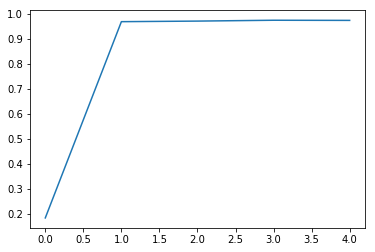

In [10]:
init = tf.global_variables_initializer()
steps = 4001
with tf.Session() as ses:
    
    ses.run(init)
    accs = []
    
    for i in range(steps):
        
        b_x,b_y = mnist.train.next_batch(128)

        
        ses.run(train,feed_dict= {NN.x:b_x,NN.y_true:b_y})
        
        if i%1000 == 0:
            
            print("Accuracy at {}:".format(i))
            act = (ses.run(acc,feed_dict= {NN.x:mnist.test.images,NN.y_true:mnist.test.labels}))
            
            print(act)
            
            accs.append(act)
            
plt.plot(np.squeeze(accs))
plt.show()
